In [1]:
import os
import sys
import pylab as p
import pylab as pl
import matplotlib as mpl
import pylab as pl
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import r2_score
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as ticker
sns.reset_defaults()
import warnings
warnings.filterwarnings('ignore')

# Settings for matplotlib
plt.rcParams["font.family"] = "Arial"
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['pdf.fonttype'] = 42

   res atom  shift_1  shift_2  shift_3  shift_4  shift_5  shift_6  shift_7  \
0   18  C1'   100.58  100.727  100.623   97.787   98.371  100.753   99.096   

   shift_8  ...  shift_11  shift_12  shift_13  shift_14  shift_15  shift_16  \
0  100.304  ...   100.947    98.923    97.671   102.498    99.859    97.811   

   shift_17  shift_18  shift_19  shift_20  
0   101.857    99.714    97.249   100.674  

[1 rows x 22 columns]


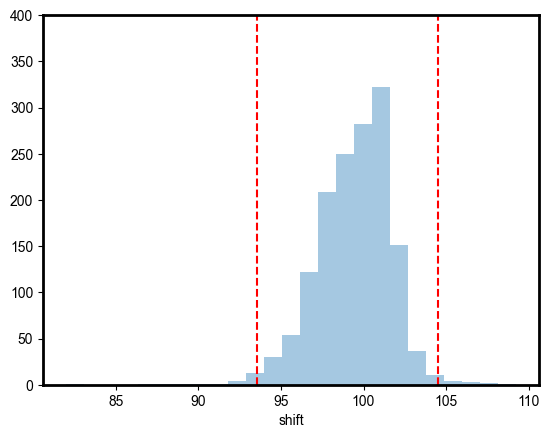

In [31]:
# Compare all predicted C1' shifts:
df1 = pd.read_csv("data/Orca_DFT/mtTAR_FARFAR_Ensemble_Benchmark_DFT.csv").drop_duplicates()
df2 = pd.read_csv("data/Orca_DFT/wtTAR_GS_ES1G34syn_Unbiased_LowestEnergy_DFT.csv").drop_duplicates()
df3 = pd.read_csv("data/Orca_DFT/wtTAR_GS_ES1G34syn_Unbiased_LowestRMSD_DFT.csv").drop_duplicates()
df4 = pd.read_csv("data/Ainan_DFT.csv").drop_duplicates()

print(df3.head(1))


C1p_shift = []
df_no = []
res = []

for dfidx, df in enumerate((df1, df2, df3)):
    df_no_ = dfidx + 1
    dft = df.loc[df.atom == "C1'", ["shift_"+str(i) for i in range(1, 21)]]
    C1p_shift += dft.iloc[:,:].to_numpy().flatten().tolist()
    df_no += [df_no_] * np.shape(dft.iloc[2:,:].to_numpy().flatten())[0]

df = pd.DataFrame()
df["shift"] = C1p_shift
#df["df_no"] = df_no
sns.distplot(df["shift"], bins= 25, hist=True, kde=False)
plt.vlines([104.483, 93.525], ymin=0, ymax=400, color="red", ls="--")
plt.ylim([0, 400])
plt.show()

   res atom  shift_1  shift_2  shift_3  shift_4  shift_5  shift_6  shift_7  \
0   18  C1'   100.58  100.727  100.623   97.787   98.371  100.753   99.096   

   shift_8  ...  shift_11  shift_12  shift_13  shift_14  shift_15  shift_16  \
0  100.304  ...   100.947    98.923    97.671   102.498    99.859    97.811   

   shift_17  shift_18  shift_19  shift_20  
0   101.857    99.714    97.249   100.674  

[1 rows x 22 columns]


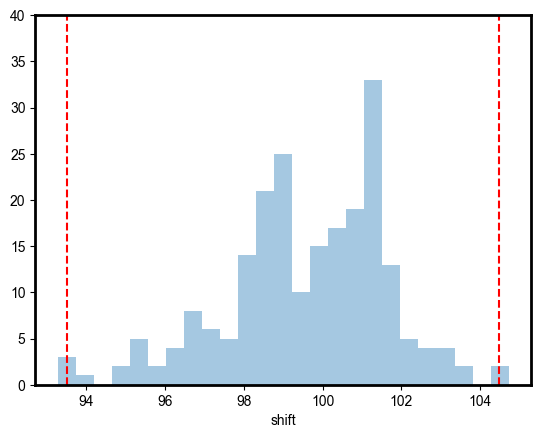

In [36]:
# Compare all predicted adenine C1' shifts:
df1 = pd.read_csv("data/Orca_DFT/mtTAR_FARFAR_Ensemble_Benchmark_DFT.csv").drop_duplicates()
df2 = pd.read_csv("data/Orca_DFT/wtTAR_GS_ES1G34syn_Unbiased_LowestEnergy_DFT.csv").drop_duplicates()
df3 = pd.read_csv("data/Orca_DFT/wtTAR_GS_ES1G34syn_Unbiased_LowestRMSD_DFT.csv").drop_duplicates()
df4 = pd.read_csv("data/Ainan_DFT.csv").drop_duplicates()




C1p_shift = []
df_no = []
res = []

for dfidx, df in enumerate((df1, df2, df3)):
    df_no_ = dfidx + 1
    dft = df.loc[((df.atom == "C1'") & (df.res.isin([20, 22, 27, 35]))), ["shift_"+str(i) for i in range(1, 21)]]
    C1p_shift += dft.iloc[:,:].to_numpy().flatten().tolist()
    df_no += [df_no_] * np.shape(dft.iloc[2:,:].to_numpy().flatten())[0]

df = pd.DataFrame()
df["shift"] = C1p_shift
#df["df_no"] = df_no
sns.distplot(df["shift"], bins= 25, hist=True, kde=False)
plt.vlines([104.483, 93.525], ymin=0, ymax=40, color="red", ls="--")
plt.ylim([0, 40])
plt.show()

In [49]:
# See where the outleirs are:
df1t = df3.loc[(df3.atom == "C1'") & (df3.res.isin([20, 22, 27, 35]))]
for i in range(1, 21):
    colname = "shift_%d"%i
    if np.sum(df1t[colname] >= 104) != 0:
        print(colname)
print(df1t)

shift_9
shift_17
     res atom  shift_1  shift_2  shift_3  shift_4  shift_5  shift_6  shift_7  \
51    20  C1'  101.134  100.735  102.939   98.781   99.137  101.372   99.541   
105   22  C1'  101.149   99.265  100.575   96.672   96.814   99.862   98.119   
227   27  C1'  101.045  100.456  101.298   98.780   99.233  101.535   99.934   
432   35  C1'  100.005   99.761   98.443   97.292   96.264   95.411   96.220   

     shift_8  ...  shift_11  shift_12  shift_13  shift_14  shift_15  shift_16  \
51   101.235  ...   101.523    99.791    98.687   103.392   100.657    98.726   
105  102.406  ...    99.461    98.001    96.298   101.687    98.831    99.155   
227  101.054  ...   101.510    99.315    98.651   103.349   100.710    98.319   
432  100.788  ...    99.745   100.994    96.558   102.577    98.650    97.169   

     shift_17  shift_18  shift_19  shift_20  
51    102.899   100.659    98.447   101.250  
105   104.719    98.070    93.486    98.658  
227   102.898   100.893    98.365   10

In [51]:
# See where the outleirs are:
df1t = df2.loc[(df3.atom == "C1'") & (df2.res.isin([20, 22, 27, 35]))]
for i in range(1, 21):
    colname = "shift_%d"%i
    if np.sum(df1t[colname] <= 94) != 0:
        print(colname)
print(df1t)

shift_2
     res atom  shift_1  shift_2  shift_3  shift_4  shift_5  shift_6  shift_7  \
51    20  C1'  100.688   97.924  101.227  101.613   98.600  102.078  100.921   
105   22  C1'  100.381   96.781   99.620  100.197   97.894  103.260   99.980   
227   27  C1'  100.402   97.959  101.310  101.482   98.646  101.979  100.819   
432   35  C1'  100.838   93.977   99.140  100.979   95.436  102.516   98.437   

     shift_8  ...  shift_11  shift_12  shift_13  shift_14  shift_15  shift_16  \
51    98.361  ...   101.568   100.930   101.814    97.978   102.833    98.897   
105   94.841  ...   100.401    98.812    98.930    95.228    97.745    96.020   
227   98.087  ...   101.576   100.511   101.481    97.662   102.453    99.044   
432   95.127  ...    99.414    99.080   101.776    94.682   100.034    96.864   

     shift_17  shift_18  shift_19  shift_20  
51     98.444   100.481   102.241    99.867  
105    95.926    97.506    99.311    96.918  
227    98.305   100.360   102.243    99.837  
4

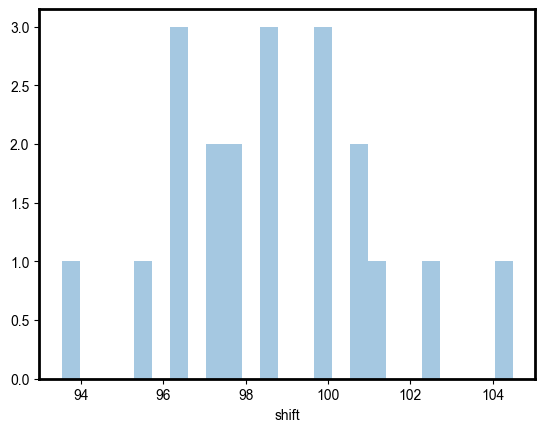

In [6]:
# Compare all predicted adenine C1' shifts in Ensemble Model:
df3 = pd.read_csv("data/Orca_DFT/wtTAR_GS_ES1G34syn_Unbiased_LowestRMSD_DFT.csv").drop_duplicates()

C1p_shift = []
C1p_shift_interest = []


df = df3
dft = df.loc[((df.atom == "C1'") & (df.res.isin([20, 22, 27, 35]))), ["shift_"+str(i) for i in range(1, 21)]]
C1p_shift += dft.iloc[:,:].to_numpy().flatten().tolist()
 

df = pd.DataFrame()
df["shift"] = C1p_shift
#df["df_no"] = df_no
sns.distplot(df["shift"], bins= 25, hist=True, kde=False)

plt.show()

Residue:  30  Atom:  C1'
Residue:  31  Atom:  C1'
Residue:  31  Atom:  C4'
Residue:  31  Atom:  C6
Residue:  34  Atom:  C1'
Residue:  34  Atom:  C8
Residue:  35  Atom:  C1'
Residue:  35  Atom:  C4'
   conf_no    zscore  res atom
0        7  2.196650   30  C1'
1       14  2.528277   30  C1'
2       14  2.269751   31  C1'
3       10 -2.229590   31  C4'
4       17  2.785553   31   C6
5       10 -2.063065   34  C1'
6       18  2.207953   34   C8
7        9  2.319512   35  C1'
8       19 -2.031893   35  C1'
9       19 -2.755289   35  C4'
[ 7 14 10 17 18  9 19]
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)


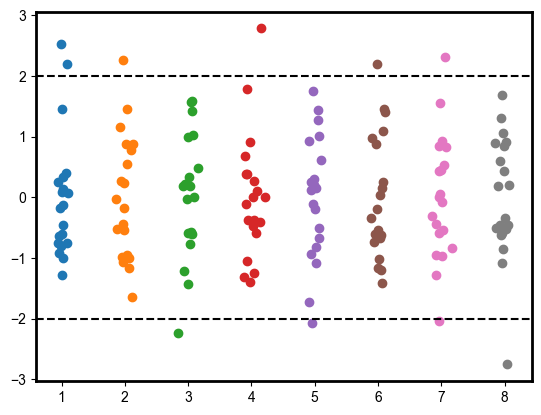

In [48]:

df = pd.read_csv("data/Orca_DFT/wtTAR_GS_ES1G34syn_Unbiased_LowestRMSD_DFT_VTSCF.csv").drop_duplicates()

res_list = [30, 31, 31, 31, 34, 34, 35, 35]
atom_list = ["C1'", "C1'", "C4'", "C6", "C1'", "C8", "C1'", "C4'"]
ZSCORES = []
SHIFTS = []
outlier_conf_no = []
outlier_zscore = []
outlier_res = []
outlier_atom = []

for (res, atom) in zip(res_list, atom_list):
    print("Residue: ", res, " Atom: ", atom)
    shifts = df.loc[(df.res == res) & (df.atom == atom)].iloc[:, -20:].to_numpy().flatten()
    zscore = (shifts-np.mean(shifts))/np.std(shifts)
    
    conf_no = np.where((zscore < -2)|(zscore > 2))[0]+1
    outlier_conf_no += conf_no.tolist()
    outlier_zscore += zscore[np.where((zscore < -2)|(zscore > 2))].tolist()
    outlier_res += [res] * len(conf_no)
    outlier_atom += [atom] * len(conf_no)
    #print(np.shape(zscore))
    ZSCORES.append(zscore)
    SHIFTS.append(shifts)

df = pd.DataFrame()
df["conf_no"] = outlier_conf_no
df["zscore"] = outlier_zscore
df["res"] = outlier_res
df["atom"] = outlier_atom

print(df)
print(df["conf_no"].unique())

count = 1
fig, ax = plt.subplots()
for z in ZSCORES:
    print(np.shape(z))
    x = np.array([count]*np.shape(z)[0]) + np.random.normal(loc=0.0, scale=0.07, size=np.shape(z)[0])
    ax.plot(x, z, marker="o", ls="")
    count += 1
ax.axhline(2, color="black", ls="--")
ax.axhline(-2, color="black", ls="--")
plt.show()


Residue:  30  Atom:  C1'
Residue:  31  Atom:  C1'
Residue:  31  Atom:  C4'
Residue:  31  Atom:  C6
Residue:  34  Atom:  C1'
Residue:  34  Atom:  C8
Residue:  35  Atom:  C1'
Residue:  35  Atom:  C4'


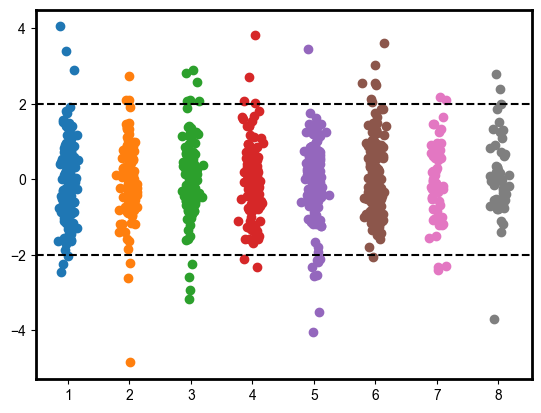

In [45]:
df = pd.read_csv("data/Orca_DFT/wtTAR_GS_ES1G34syn_Unbiased_LowestRMSD_DFT_VTSCF.csv").drop_duplicates()

res_list = [30, 31, 31, 31, 34, 34, 35, 35]
res_group_list = {
    30: [19, 24, 29, 30, 37, 39, 41, 44, 45],
    31: [23, 25, 31, 38, 40, 42],
    32: [17, 18, 21, 26, 32, 33, 34, 36, 43],
    33: [17, 18, 21, 26, 32, 33, 34, 36, 43],
    34: [17, 18, 21, 26, 32, 33, 34, 36, 43],
    35: [20, 22, 35]
}

atom_list = ["C1'", "C1'", "C4'", "C6", "C1'", "C8", "C1'", "C4'"]
ZSCORES = []
SHIFTS = []

for (res, atom) in zip(res_list, atom_list):
    print("Residue: ", res, " Atom: ", atom)
    shifts = df.loc[(df.res.isin(res_group_list[res])) & (df.atom == atom)].iloc[:, -20:].to_numpy().flatten()
    zscore = (shifts-np.mean(shifts))/np.std(shifts)
    ZSCORES.append(zscore)
    SHIFTS.append(shifts)
count = 1
fig, ax = plt.subplots()
for z in ZSCORES:
    x = np.array([count]*np.shape(z)[0]) + np.random.normal(loc=0.0, scale=0.07, size=np.shape(z)[0])
    ax.plot(x, z, marker="o", ls="")
    count += 1
ax.axhline(2, color="black", ls="--")
ax.axhline(-2, color="black", ls="--")

plt.show()


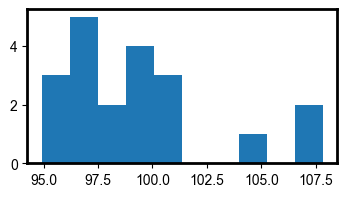

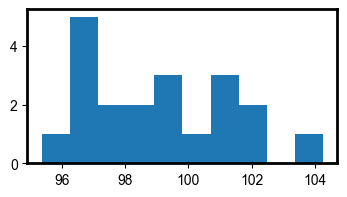

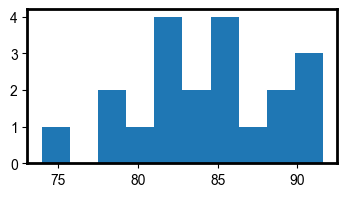

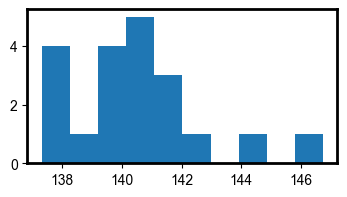

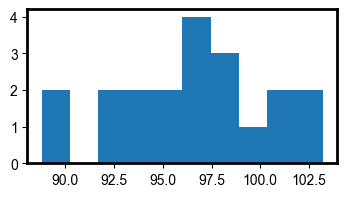

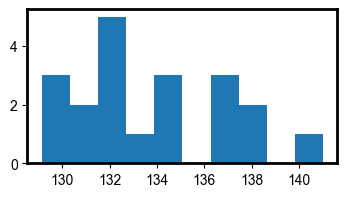

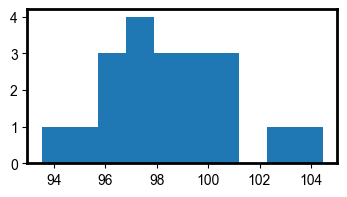

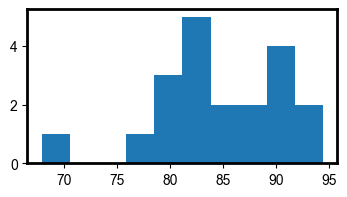

In [24]:
for shifts in SHIFTS:
    fig, ax = plt.subplots(figsize=(4,2))
    ax.hist(shifts, bins=10)
plt.show()